# 5 Modeling<a id='5_Modeling'></a>

## 5.1 Contents<a id='5.1_Contents'></a>
* [5 Modeling](#5_Modeling)
  * [5.1 Contents](#5.1_Contents)
  * [5.2 Introduction](#5.2_Introduction)
  * [5.3 Imports](#5.3_Imports)
  * [5.4 Load Data](#5.4_Load_Data)
  * [5.5 Prepare Data](#5.5_Prepare_Data)
  * [5.6 Splitting Data](#5.6_Splitting_Data)
      * [5.6.1 Scaling data](#5.6.1_Scaling_data)
  * [5.7 Training Modela](#5.7_Training_Models)
     * [5.7.1 Linear Regression](#5.7.1_Linear_Regression)
          * [5.7.1.1 OLS on Scaled data](#5.7.1.1_OLS_on_Scaled_data)
     * [5.7.2 Lasso Regression](#5.7.2_Lasso_Regression)
          * [5.7.2.1 Lasso on Scaled data](#5.7.2.1_Lasso_on_Scaled_data)
     * [5.7.3 Bayesian Ridge Regression](#5.7.3_Bayesian_Ridge_Regression)
          * [5.7.3.1 Bayesian Ridge on Scaled data](#5.7.3.1_Bayesian_Ridge_on_Scaled_data)
     * [5.7.4 SGD Regression](#5.7.4_SGD_Regression)
          * [5.7.4.1 SGD on Scaled data](#5.7.4.1_SGD_on_Scaled_data)
     * [5.7.5 Decision Tree Regression](#5.7.5_Decision_Tree_Regression)
     * [5.7.6 Random Forest Regression](#5.7.6_Random_Forest_Regression)
  * [5.8 Using GridSearchCV & Cross-Validation](#5.8_Using_GridSearchCV_&_Cross-Validation)
     * [5.8.1 Multiple Linear Regression without Regularization](#5.8.1_Multiple_Linear_Regression_without_Regularization)
     * [5.8.2 GridSearchCV with Ridge](#5.8.2_GridSearchCV_with_Ridge)
     * [5.8.3 GridSearchCV with Lasso](#5.8.3_GridSearchCV_with_Lasso)
     * [5.8.4 GridSearchCV with ElasticNet](#5.8.4_GridSearchCV_with_ElasticNet)
     * [5.8.5 Dataframe of Coefficients](#5.8.5_Dataframe_of_Coefficients)
   


## 5.2 Introduction<a id='5.2_Introduction'></a>

In this notebook, we now take our two final datasets one which is original with all the features and the other a smaller version excluding two features i.e State & City. Here we will train our data in some regression models (Linear as well as non- linear) to gain insights about the duration prediction for the UFO Sightings as well as explore the sensitivity of changes to various parameters. 


## 5.3 Imports<a id='5.3_Imports'></a>

In [55]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders 
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import sca#le
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report

## 5.4 Load Data<a id='5.4_Load_Data'></a>

Lets load the previously cleaned and preprocessed datasets, One dataset has all the featrures as in the original dataset and the second dataset has reduced features except State & City

In [2]:
data_1 = pd.read_csv('UFO_dataset_1.csv')

In [3]:
data_2 = pd.read_csv('UFO_dataset_2.csv')

In [4]:
data_1 = data_1.drop(['Unnamed: 0'], axis = 1)

In [5]:
data_1.head()

,Duration_minutes,Country,State,City,Year,Month,sh,lat,long,Day,Hour
0,45.00,US,Texas,San Marcos,1949,10,cylinder,29.883056,-97.941111,10,20
1,60.00,US,Texas,Lackland Air Force Base,1949,10,light,29.384210,-98.581082,10,21
2,0.33,GB,England,Blacon,1955,10,circle,53.200000,-2.916667,10,17
3,30.00,US,Texas,Edna,1956,10,circle,28.978333,-96.645833,10,21
4,15.00,US,Hawaii,Kane'ohe,1960,10,light,21.418056,-157.803611,10,20


In [6]:
data_2 = data_2.drop(['Unnamed: 0'], axis = 1)

In [7]:
data_2.head()

,Duration_minutes,Country,Year,Month,sh,lat,long,Day,Hour
0,45.00,US,1949,10,cylinder,29.883056,-97.941111,10,20
1,60.00,US,1949,10,light,29.384210,-98.581082,10,21
2,0.33,GB,1955,10,circle,53.200000,-2.916667,10,17
3,30.00,US,1956,10,circle,28.978333,-96.645833,10,21
4,15.00,US,1960,10,light,21.418056,-157.803611,10,20


Changing Numerical duration in minutes into categorical columns with 5 categories

* Very Short < 5 minutes
* Short - - 15 minutes
* Medium - 15 - 120 minutes
* Long - 120 - 600 minutes
* Unreal - > 600 minutes

In [8]:
bins = [0, 5, 15, 120, 600, np.inf]
names = ['Very Short', 'Short', 'Medium', 'Long', 'Unreal']

data_1['Duration'] = pd.cut(data_1['Duration_minutes'], bins, labels=names)
data_2['Duration'] = pd.cut(data_1['Duration_minutes'], bins, labels=names)

Dropping Duration in minutes, latitude and longitude column

In [9]:
data_1 = data_1.drop(['Duration_minutes','lat','long'], axis = 1)

In [10]:
data_1.head()

,Country,State,City,Year,Month,sh,Day,Hour,Duration
0,US,Texas,San Marcos,1949,10,cylinder,10,20,Medium
1,US,Texas,Lackland Air Force Base,1949,10,light,10,21,Medium
2,GB,England,Blacon,1955,10,circle,10,17,Very Short
3,US,Texas,Edna,1956,10,circle,10,21,Medium
4,US,Hawaii,Kane'ohe,1960,10,light,10,20,Short


In [11]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77544 entries, 0 to 77543
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Country   77544 non-null  object  
 1   State     77544 non-null  object  
 2   City      77544 non-null  object  
 3   Year      77544 non-null  int64   
 4   Month     77544 non-null  int64   
 5   sh        77544 non-null  object  
 6   Day       77544 non-null  int64   
 7   Hour      77544 non-null  int64   
 8   Duration  77487 non-null  category
dtypes: category(1), int64(4), object(4)
memory usage: 4.8+ MB


Histogram showing distribution of duration timings by categories. Mostly we have very short duration i.e less than 5 minutes with more than 50000 sightings

<AxesSubplot:>

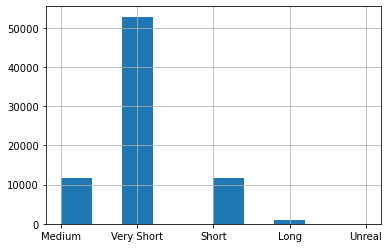

In [12]:
data_1.Duration.hist()

After changing into categorical we get 57 more null values for the target variable, just subsetting teh dataframe on duration column

In [14]:
data_1.isnull().sum()

Country      0
State        0
City         0
Year         0
Month        0
sh           0
Day          0
Hour         0
Duration    57
dtype: int64

In [15]:
data_1 = data_1.dropna(subset = ['Duration'])

<b> Dataset 1 </b>

In [16]:
data_1.head()

,Country,State,City,Year,Month,sh,Day,Hour,Duration
0,US,Texas,San Marcos,1949,10,cylinder,10,20,Medium
1,US,Texas,Lackland Air Force Base,1949,10,light,10,21,Medium
2,GB,England,Blacon,1955,10,circle,10,17,Very Short
3,US,Texas,Edna,1956,10,circle,10,21,Medium
4,US,Hawaii,Kane'ohe,1960,10,light,10,20,Short


In [19]:
data_2 = data_2.drop(['Duration_minutes','lat','long'], axis = 1)

<b> Dataset 2 </b>

In [20]:
data_2.head()

,Country,Year,Month,sh,Day,Hour,Duration
0,US,1949,10,cylinder,10,20,Medium
1,US,1949,10,light,10,21,Medium
2,GB,1955,10,circle,10,17,Very Short
3,US,1956,10,circle,10,21,Medium
4,US,1960,10,light,10,20,Short


In [26]:
data_2 = data_2.dropna(subset = ['Duration'])

In Dataset 1, we have four cateforical features i.e Country, State, City, Shape while in Datset 2 we have 2 categorical features i.e Country and Shape.

As per the preprocessing done in the previous notebook, Our categorical columns have following unique values

    * Country  - 10 
    * State - 796
    * City - >10000
    * Shape - 28

In few steps below we have encoded our categorical variables as to have all numerical features for regression modelling

Since we have to convert aur categorical features into numerical for regressiona models, encoding for categorical features is performed below

* I have used two encoding techniques - Binary Encoding for the original dataset and Ordinal encoding for the second dataset

### 5.5.1 Encoding Categorical<a id='5.5.1_Encoding_catgorical'></a>

In [31]:
from sklearn import preprocessing
X = data_2[['Country','Year','Month','sh','Day','Hour']]
y = data_2['Duration']

X = pd.get_dummies(X)
#ce_lab = preprocessing.LabelEncoder()

#X = cenc.fit_transform(X)
#y = ce_lab.fit_transform(y)

In [32]:
X.shape

(77487, 42)

In [56]:
X_1 = data_1[['Country','Year','Month','sh','Day','Hour','State','City']]
y_1 = data_1['Duration']

ce_bin = category_encoders.BinaryEncoder(cols=['Country','sh','State','City'])

X_1 = ce_bin.fit_transform(X_1)

D:\Anacon\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [57]:
X_1.shape

(77487, 41)

After using Binary encoding or original data, Because Of State and City columns which have a lot of unique values,
we have 43 columns and 77544 rows

## 5.6 Splitting Data<a id='5.6_Splitting_Data'></a>

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 40)

In [58]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = .25, random_state = 40)

## 5.7 Training Models<a id='5.7_Training_Models'></a>

First Model to train is the Multiple Linear regression withoput any regulaization, Here I am using second dataset to train and predict for my test set. Metrics being used are RMSE & R2

### 5.7.1 Decision Tree Classification<a id='5.7.1_Decision_Tree_Classification'></a>

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

In [35]:
confusion_matrix(y_test, dtree_predictions)

array([[    0,     1,     0,     0,   283],
       [    0,    11,     0,     0,  2965],
       [    0,    10,     0,     0,  2955],
       [    0,     0,     0,     0,    15],
       [    0,     8,     0,     0, 13124]], dtype=int64)

In [36]:
classification_report(y_test, dtree_predictions)

D:\Anacon\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n        Long       0.00      0.00      0.00       284\n      Medium       0.37      0.00      0.01      2976\n       Short       0.00      0.00      0.00      2965\n      Unreal       0.00      0.00      0.00        15\n  Very Short       0.68      1.00      0.81     13132\n\n    accuracy                           0.68     19372\n   macro avg       0.21      0.20      0.16     19372\nweighted avg       0.52      0.68      0.55     19372\n'

In [41]:
dtree_model.score(X_test, y_test)

0.6780404707825728

<b> Data Set 2</b>

In [60]:
#from sklearn.tree import DecisionTreeClassifier
dtree_model_1 = DecisionTreeClassifier(max_depth = 3).fit(X_1_train, y_1_train)
dtree_predictions_1 = dtree_model_1.predict(X_1_test)

In [61]:
confusion_matrix(y_1_test, dtree_predictions_1)

array([[    0,     0,     0,     0,   284],
       [    0,     0,     0,     0,  2976],
       [    0,     0,     1,     0,  2964],
       [    0,     0,     0,     0,    15],
       [    0,     0,     2,     0, 13130]], dtype=int64)

In [63]:
dtree_model_1.score(X_1_test, y_1_test)

0.6778339871980178

### 5.7.2 KNN Classification<a id='5.7.2_KNN_Classification'></a>

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

In [38]:
knn_predictions = knn.predict(X_test)

In [39]:
confusion_matrix(y_test, knn_predictions)

array([[    1,    27,     9,     0,   247],
       [    5,   282,   155,     0,  2534],
       [    0,   213,   186,     0,  2566],
       [    1,     1,     2,     0,    11],
       [    8,   791,   691,     0, 11642]], dtype=int64)

In [40]:
knn.score(X_test, y_test)

0.6251806731364856

### 5.7.3 Naive Baiyes Classification<a id='5.7.3_Naive_Baiyes_Classification'></a>

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)


In [43]:
confusion_matrix(y_test, y_pred)

array([[   33,     1,     0,   249,     1],
       [  354,    13,    17,  2572,    20],
       [  409,    11,    32,  2492,    21],
       [    2,     0,     0,    13,     0],
       [ 1991,    50,   116, 10821,   154]], dtype=int64)

In [45]:
gnb.score(X_test, y_test)

0.012647119553995457

### 5.7.4 random Forest Classification<a id='5.7.4_Random_Forest_Classification'></a>

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
y_pred = rf.fit(X_train, y_train).predict(X_test)

In [47]:
confusion_matrix(y_test, y_pred) 

array([[    5,    16,     9,     0,   254],
       [   13,   247,   163,     0,  2553],
       [    4,   187,   196,     0,  2578],
       [    1,     1,     1,     0,    12],
       [   15,   605,   587,     5, 11920]], dtype=int64)

In [48]:
rf.score(X_test, y_test)

0.6384472434441462

### 5.7.5 SVM Classification<a id='5.7.5_SVM_Classification'></a>

In [64]:
from sklearn.svm import SVC

model_SV = SVC(decision_function_shape='ovo')
# fit model
model_SV.fit(X_train, y_train)
# make predictions
y_pred = model_SV.predict(X_train)

In [65]:
model_SV.score(X_test, y_test)

0.6778856080941565

## 5.8 Using GridSearchCV & Cross-Validation<a id='5.8_Using_GridSearchCV_&_Cross-Validation'></a>

we have two sets X_1, X_2 , using various regression techniques to find the best parameters and model for our data using cross validation and GridsearchCV to see if we can fine tune our parmaters and improve our model. We will use R2 score as our metric for the gridsearch evaluation.
We are using dataset without splitting

### 5.8.1 GridSearchCV with Decision Tree Classifier<a id='5.8.1_GridSearchCV_with_Decision_Tree_Classifier'></a>

In [66]:
parameter_grid = {'max_depth': [3, 4, 5,6,7,8,9,10,15,20],
                 'criterion':['gini','entropy'],
                 }

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid = parameter_grid,
                          cv =10)

grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.6830250356995531
Best params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 3}


In [71]:
model_f = DecisionTreeClassifier(max_depth = 3, max_features = 3, criterion = 'gini').fit(X_train, y_train)
y_pre = model_f.predict(X_test)